In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [25]:
np.random.seed(0)

In [26]:
# Generate normal data points centered around a mean
normal_data = np.random.normal(loc=0.5, scale=0.1, size=(1000, 2))

In [27]:
# Generate anomaly data points, clearly distinct from the normal data
anomalies = np.random.uniform(low=0.0, high=1.0, size=(50, 2))

In [28]:
normal_data.shape

(1000, 2)

In [29]:
normal_data

array([[0.67640523, 0.54001572],
       [0.5978738 , 0.72408932],
       [0.6867558 , 0.40227221],
       ...,
       [0.51978282, 0.50977508],
       [0.64015234, 0.51584338],
       [0.38580986, 0.36890296]])

<Axes: ylabel='Density'>

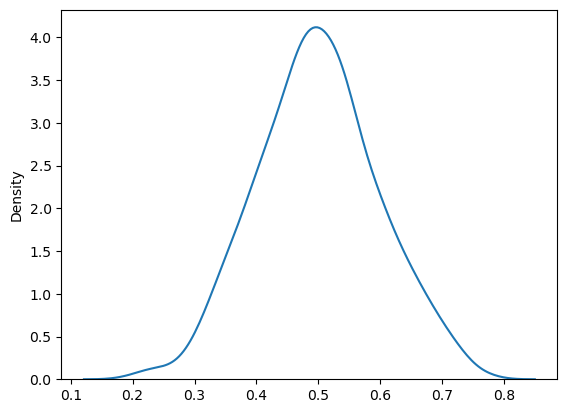

In [30]:
import seaborn as sns
sns.kdeplot(normal_data[:,1])

<Axes: ylabel='Density'>

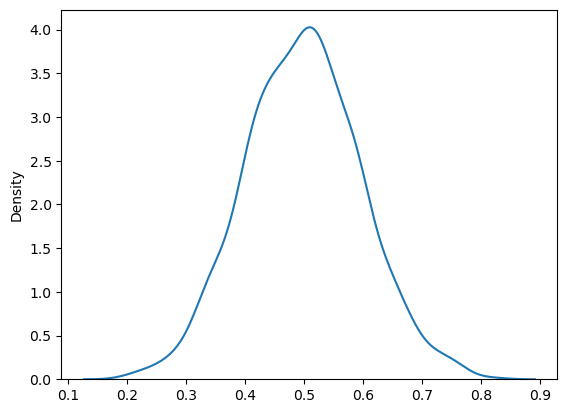

In [31]:
sns.kdeplot(normal_data[:,0])

In [32]:
row_mask = np.any((anomalies < 0.2) | (anomalies > 0.8), axis=1)
anomalies = anomalies[row_mask]
# Combine into a single dataset
data = np.vstack([normal_data, anomalies])
labels = np.array([0] * len(normal_data) + [1] * len(anomalies))
# 0 for normal, 1 for anomaly

In [33]:
row_mask

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False])

In [34]:
anomalies

array([[0.10325322, 0.51909894],
       [0.09680322, 0.88976214],
       [0.06184478, 0.44969443],
       [0.28469407, 0.15486942],
       [0.14594789, 0.63276564],
       [0.0922796 , 0.68551272],
       [0.71602392, 0.86216627],
       [0.96511632, 0.79651226],
       [0.845238  , 0.45543639],
       [0.09268519, 0.45490427],
       [0.8719684 , 0.44828215],
       [0.01434915, 0.61148532],
       [0.99583   , 0.81724858],
       [0.61723795, 0.91439889],
       [0.81358168, 0.49863935],
       [0.84642616, 0.0581764 ],
       [0.53950193, 0.15851485],
       [0.40952683, 0.07687299],
       [0.68930069, 0.95370618],
       [0.96402039, 0.66194873],
       [0.06877785, 0.01077776],
       [0.99704634, 0.22050558],
       [0.92810177, 0.65201286],
       [0.41960036, 0.19922815],
       [0.44787809, 0.96622114],
       [0.79302867, 0.82643041],
       [0.95392047, 0.38885063],
       [0.67345848, 0.95293679],
       [0.9180044 , 0.79930564]])

In [35]:
x = np.array([[5,6],[7,8]])
y = np.array([[1,2],[4,8]])

In [36]:
x

array([[5, 6],
       [7, 8]])

In [37]:
y

array([[1, 2],
       [4, 8]])

In [38]:
np.vstack([x,y])

array([[5, 6],
       [7, 8],
       [1, 2],
       [4, 8]])

In [39]:
data.shape

(1029, 2)

In [40]:
labels.shape

(1029,)

In [41]:
pd.Series(labels).value_counts()

0    1000
1      29
Name: count, dtype: int64

In [43]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [44]:
# We will train the autoencoder ONLY on the normal data
train_data = data_scaled[labels == 0]
test_data = data_scaled # The full dataset for testing
test_labels = labels

<Axes: ylabel='Density'>

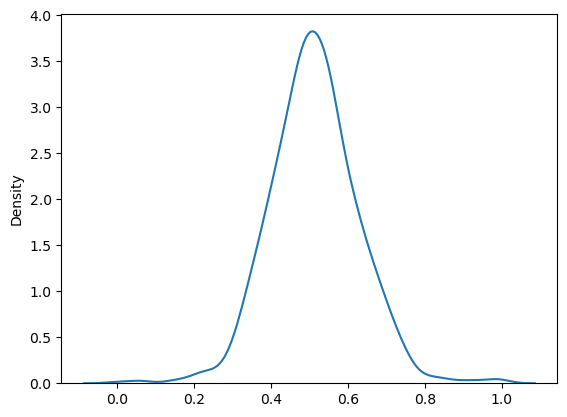

In [45]:
sns.kdeplot(test_data[:,1])

In [46]:
train_data.shape

(1000, 2)

In [47]:
input_dim = train_data.shape[1]
latent_dim = 1 # The compressed dimension

In [62]:
class Autoencoder(keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Encoder converts input into latent representation
        self.encoder = keras.Sequential([
            layers.Dense(8, activation='relu', input_shape=(input_dim,)),
            layers.Dense(4, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])

        # Decoder converts latent representation back to original input
        self.decoder = keras.Sequential([
            layers.Dense(4, activation='relu'),
            layers.Dense(8, activation='relu'),
            layers.Dense(input_dim, activation='sigmoid')  # Sigmoid for output between 0 and 1
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [63]:
def call(self, x):
 encoded = self.encoder(x)
 decoded = self.decoder(encoded)
 return decoded

In [65]:
# create the object of Autoencoder
autoencoder = Autoencoder(input_dim, latent_dim)

In [66]:
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics
autoencoder.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [67]:
history = autoencoder.fit(train_data, train_data, epochs=50,
batch_size=5)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0805 - mae: 0.0805  
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804   
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804  
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804    
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804    
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0804 - mae: 0.0804    
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804    
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804    
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0804 - mae: 0.0804  
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0804 - mae: 0.0804    
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0804 - mae: 0.0804  
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0804 - ma

In [68]:
reconstructions = autoencoder.predict(test_data, batch_size=1)

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [69]:
reconstructions

array([[0.4928381, 0.5090978],
       [0.4928381, 0.5090978],
       [0.4928381, 0.5090978],
       ...,
       [0.4931205, 0.5089383],
       [0.4928381, 0.5090978],
       [0.4928381, 0.5090978]], dtype=float32)

In [70]:
test_data

array([[0.67371321, 0.55391871],
       [0.59379904, 0.74657649],
       [0.68424603, 0.4097516 ],
       ...,
       [0.95611479, 0.39570411],
       [0.67071458, 0.98609615],
       [0.91956633, 0.82530049]])